In [1]:
%load_ext autoreload
%autoreload 2

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools
from neurodyn import *
import matplotlib_tufte
matplotlib_tufte.setup()
from matplotlib_tufte import *

## Simulate larger and larger networks

### histogram and overlap trajectory

**We start an RNN, p=2, no external current**

(we also assess that exchanging $\mu=0 \leftrightarrow \mu=1$ doesn't change the dynamics -> OK)

[LowRankRNN{N=1000, p=2, phi=sigmoid, I_ext=zero}] loading cached simulation dba7e9cb36...
[LowRankRNN{N=1000, p=2, phi=sigmoid, I_ext=zero}] loading cached simulation 05ed5a3414...
[LowRankRNN{N=1000, p=2, phi=sigmoid, I_ext=zero}] loading cached simulation 0ff06426dd...
[LowRankRNN{N=1000, p=2, phi=sigmoid, I_ext=zero}] loading cached simulation dc6da9ac29...
[LowRankRNN{N=1000, p=2, phi=sigmoid, I_ext=zero}] loading cached simulation 2222ec8243...
[LowRankRNN{N=1000, p=2, phi=sigmoid, I_ext=zero}] loading cached simulation cb5d978850...
[LowRankRNN{N=1000, p=2, phi=sigmoid, I_ext=zero}] loading cached simulation 1213d1b105...
[LowRankRNN{N=1000, p=2, phi=sigmoid, I_ext=zero}] loading cached simulation ce63ad91d5...
[LowRankRNN{N=1000, p=2, phi=sigmoid, I_ext=zero}] loading cached simulation b21ee191ca...
[LowRankRNN{N=1000, p=2, phi=sigmoid, I_ext=zero}] loading cached simulation 4d367417fb...
[LowRankRNN{N=1000, p=2, phi=sigmoid, I_ext=zero}] loading cached simulation 9422ab2ac5...

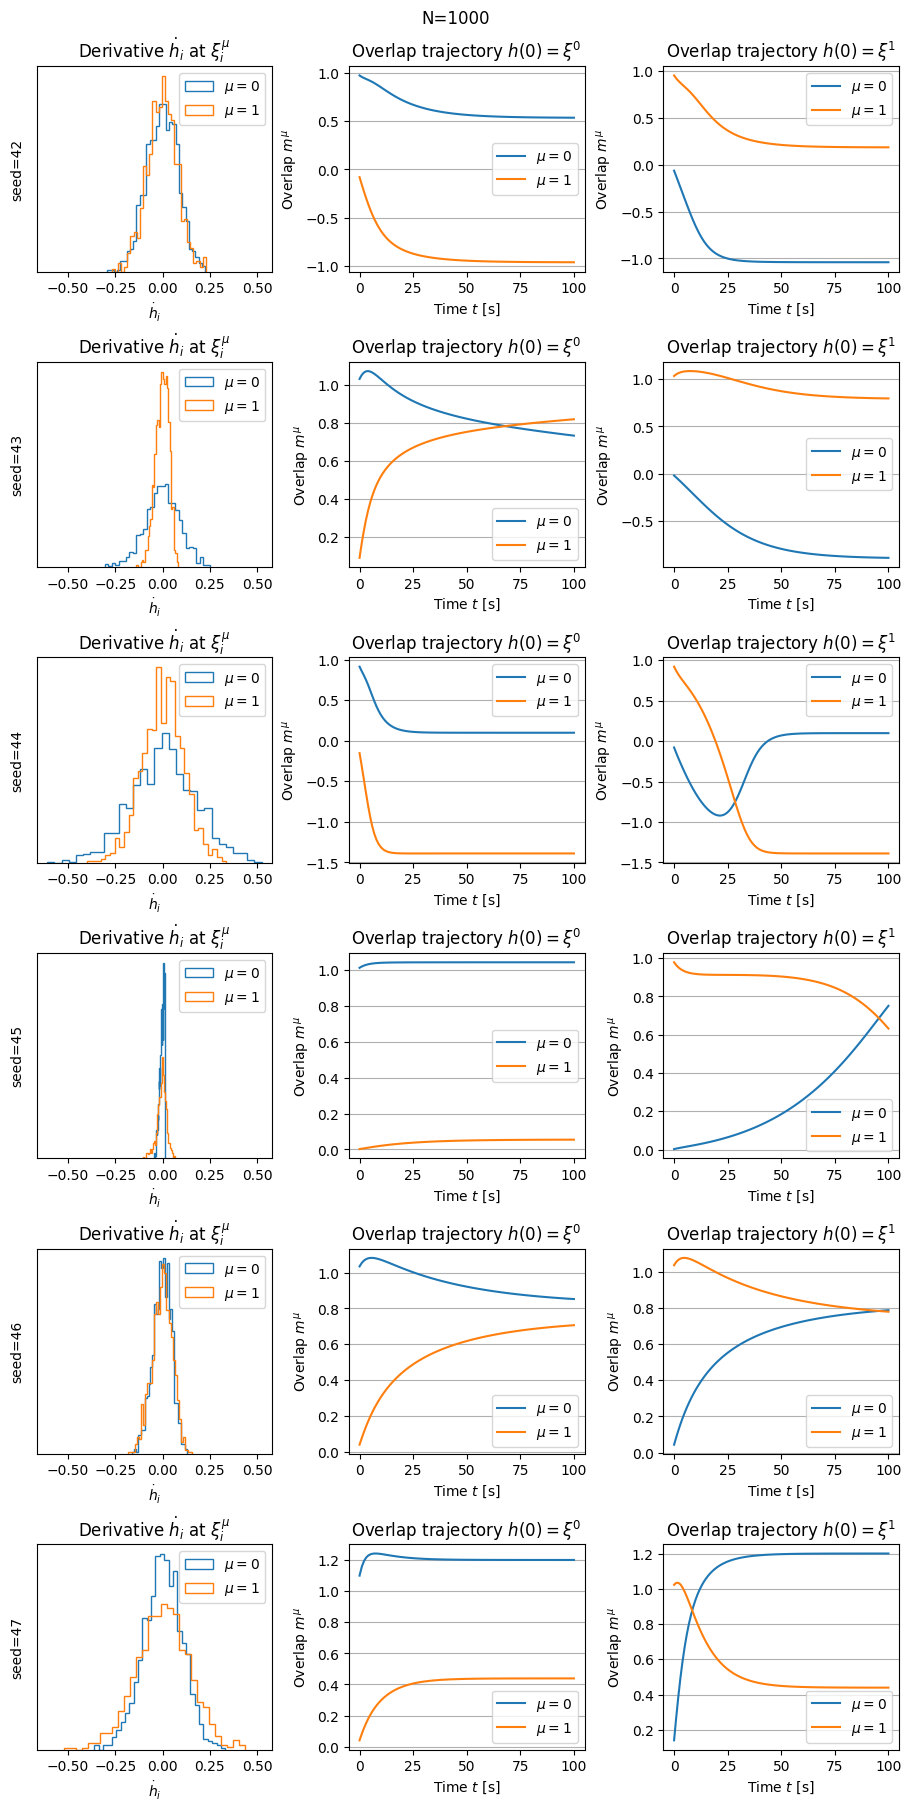

[LowRankRNN{N=10000, p=2, phi=sigmoid, I_ext=zero}] loading cached simulation 31f57808c0...
[LowRankRNN{N=10000, p=2, phi=sigmoid, I_ext=zero}] loading cached simulation 01b771040f...
[LowRankRNN{N=10000, p=2, phi=sigmoid, I_ext=zero}] loading cached simulation 1fa328d345...
[LowRankRNN{N=10000, p=2, phi=sigmoid, I_ext=zero}] loading cached simulation 85f4af0c9c...
[LowRankRNN{N=10000, p=2, phi=sigmoid, I_ext=zero}] loading cached simulation 9f8f2424e3...
[LowRankRNN{N=10000, p=2, phi=sigmoid, I_ext=zero}] loading cached simulation 8b4ba823f4...
[LowRankRNN{N=10000, p=2, phi=sigmoid, I_ext=zero}] loading cached simulation 78e9ad1e99...
[LowRankRNN{N=10000, p=2, phi=sigmoid, I_ext=zero}] loading cached simulation 2849ec8bf7...
[LowRankRNN{N=10000, p=2, phi=sigmoid, I_ext=zero}] loading cached simulation b08e7afef4...
[LowRankRNN{N=10000, p=2, phi=sigmoid, I_ext=zero}] loading cached simulation 12f0289428...
[LowRankRNN{N=10000, p=2, phi=sigmoid, I_ext=zero}] loading cached simulation 1f

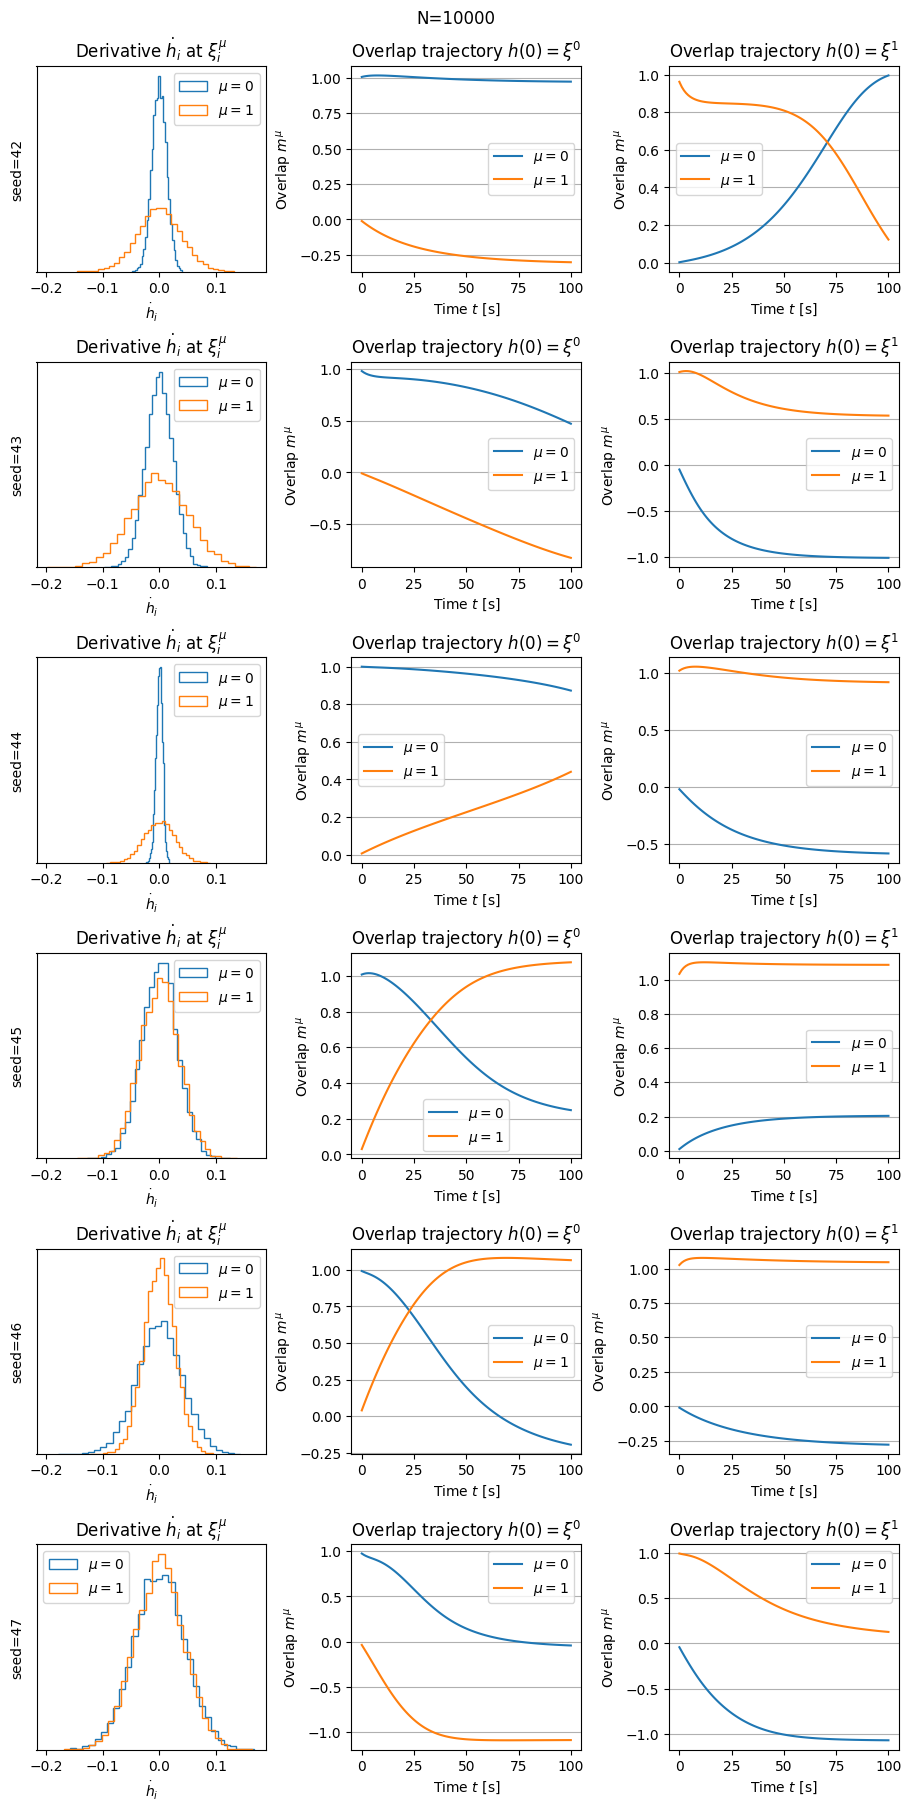

[LowRankRNN{N=50000, p=2, phi=sigmoid, I_ext=zero}] loading cached simulation 09c1d01a4b...
[LowRankRNN{N=50000, p=2, phi=sigmoid, I_ext=zero}] loading cached simulation d748d305e9...
[LowRankRNN{N=50000, p=2, phi=sigmoid, I_ext=zero}] loading cached simulation 898f2edc03...
[LowRankRNN{N=50000, p=2, phi=sigmoid, I_ext=zero}] loading cached simulation d3c6debf92...
[LowRankRNN{N=50000, p=2, phi=sigmoid, I_ext=zero}] loading cached simulation 990854dec4...
[LowRankRNN{N=50000, p=2, phi=sigmoid, I_ext=zero}] loading cached simulation f9cb6b3765...
[LowRankRNN{N=50000, p=2, phi=sigmoid, I_ext=zero}] loading cached simulation 51fc9f4b37...
[LowRankRNN{N=50000, p=2, phi=sigmoid, I_ext=zero}] loading cached simulation 33509a1525...
[LowRankRNN{N=50000, p=2, phi=sigmoid, I_ext=zero}] loading cached simulation 7534e5dfa1...
[LowRankRNN{N=50000, p=2, phi=sigmoid, I_ext=zero}] loading cached simulation 28c88d57bb...
[LowRankRNN{N=50000, p=2, phi=sigmoid, I_ext=zero}] loading cached simulation 4c

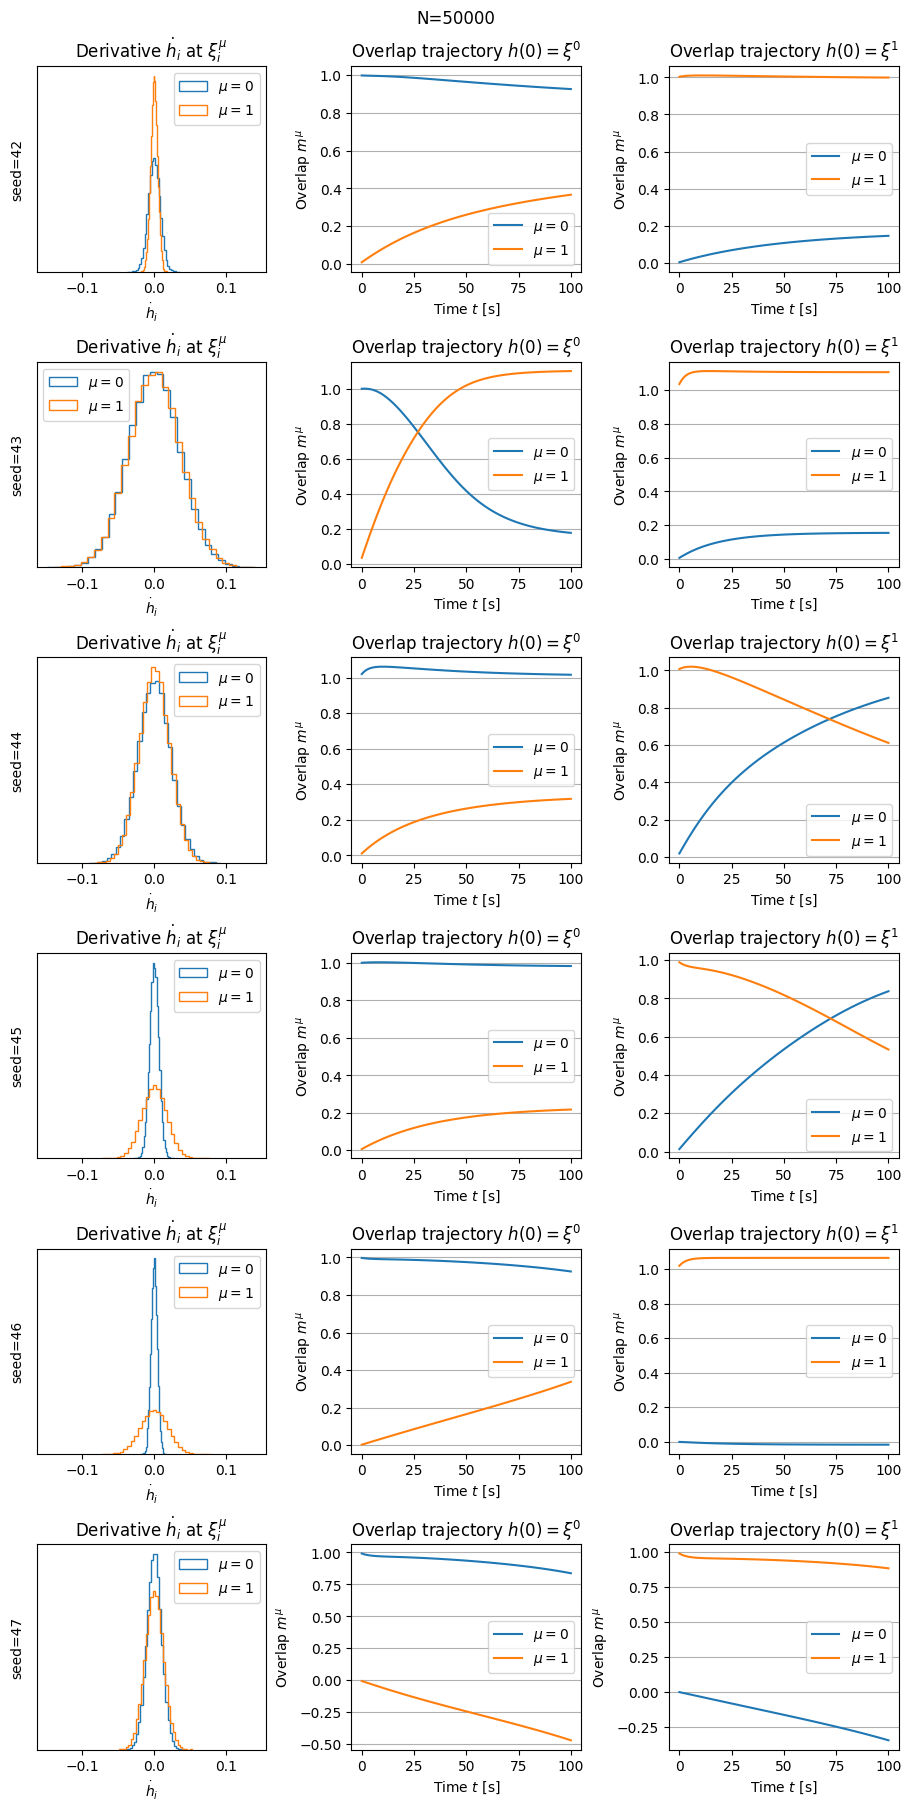

[LowRankRNN{N=100000, p=2, phi=sigmoid, I_ext=zero}] loading cached simulation ebada8235a...
[LowRankRNN{N=100000, p=2, phi=sigmoid, I_ext=zero}] loading cached simulation 6c2c2bfc52...
[LowRankRNN{N=100000, p=2, phi=sigmoid, I_ext=zero}] loading cached simulation 162b0ae47e...
[LowRankRNN{N=100000, p=2, phi=sigmoid, I_ext=zero}] loading cached simulation 1a55e5463b...
[LowRankRNN{N=100000, p=2, phi=sigmoid, I_ext=zero}] loading cached simulation 6d80f79736...
[LowRankRNN{N=100000, p=2, phi=sigmoid, I_ext=zero}] loading cached simulation 5de7ae3698...
[LowRankRNN{N=100000, p=2, phi=sigmoid, I_ext=zero}] loading cached simulation 392e336b03...
[LowRankRNN{N=100000, p=2, phi=sigmoid, I_ext=zero}] loading cached simulation fbeefa8599...
[LowRankRNN{N=100000, p=2, phi=sigmoid, I_ext=zero}] loading cached simulation 6783b928b7...
[LowRankRNN{N=100000, p=2, phi=sigmoid, I_ext=zero}] loading cached simulation 80f4d822b3...
[LowRankRNN{N=100000, p=2, phi=sigmoid, I_ext=zero}] loading cached si

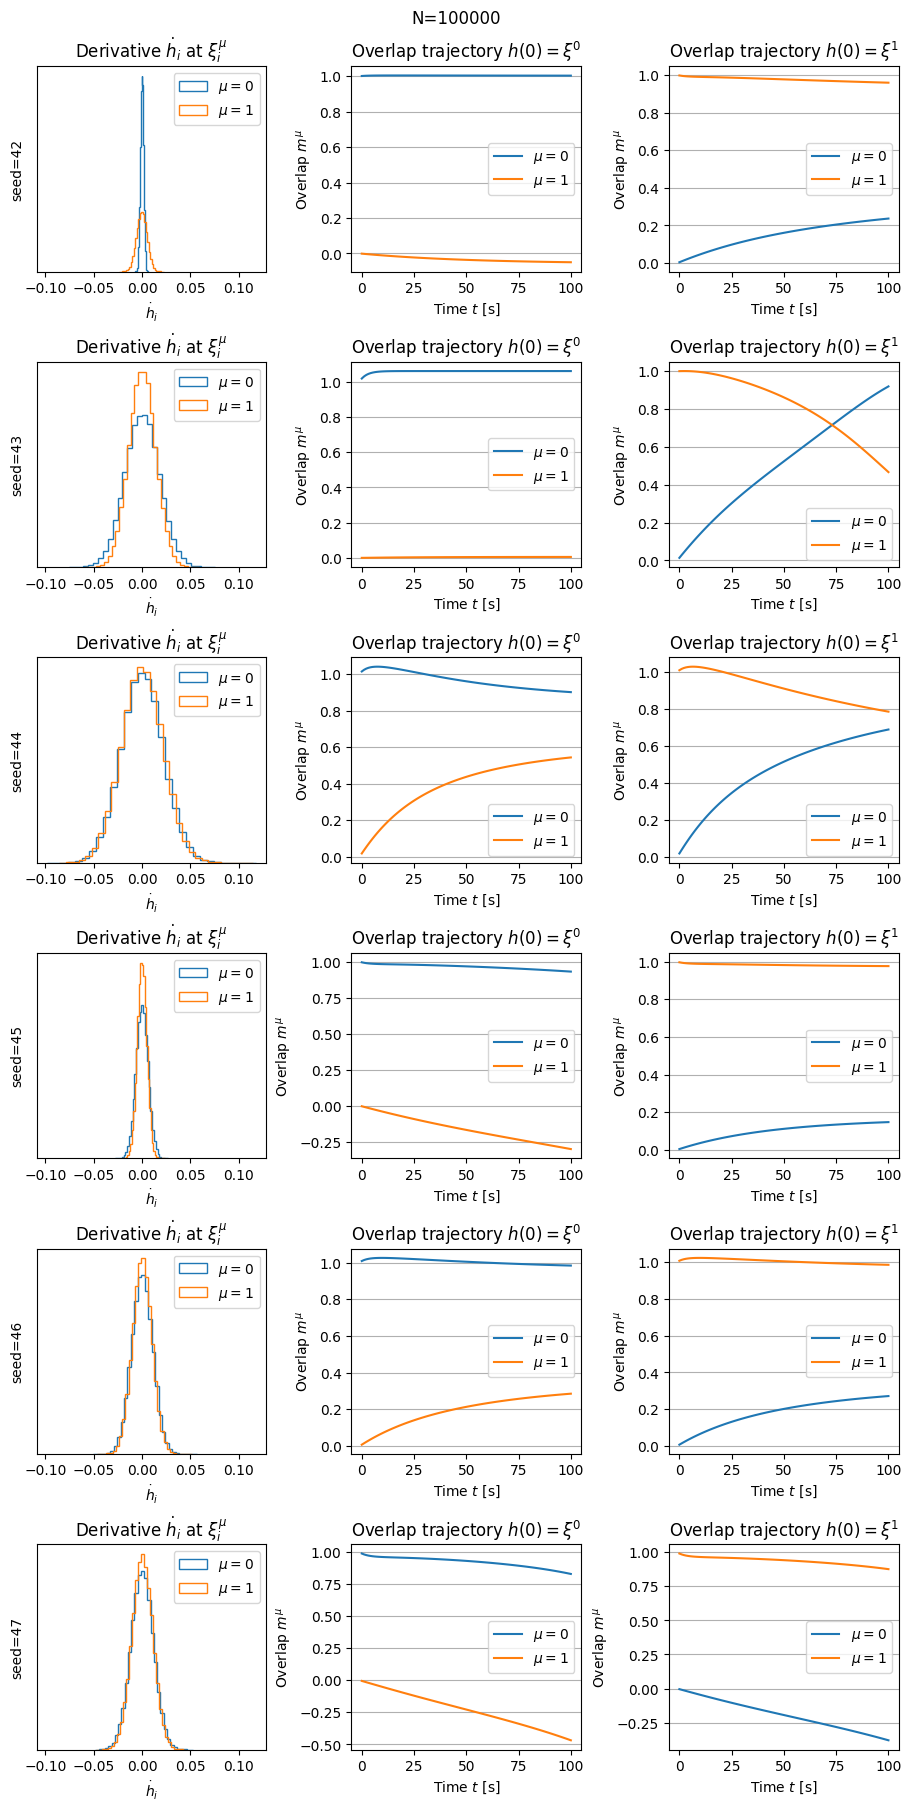

[LowRankRNN{N=500000, p=2, phi=sigmoid, I_ext=zero}] loading cached simulation 5435def50c...
[LowRankRNN{N=500000, p=2, phi=sigmoid, I_ext=zero}] loading cached simulation 7060c4827e...
[LowRankRNN{N=500000, p=2, phi=sigmoid, I_ext=zero}] loading cached simulation 50172dafbc...
[LowRankRNN{N=500000, p=2, phi=sigmoid, I_ext=zero}] loading cached simulation 5b872ece0e...
[LowRankRNN{N=500000, p=2, phi=sigmoid, I_ext=zero}] loading cached simulation 4ef2fbb025...
[LowRankRNN{N=500000, p=2, phi=sigmoid, I_ext=zero}] loading cached simulation ce064da086...
[LowRankRNN{N=500000, p=2, phi=sigmoid, I_ext=zero}] loading cached simulation c0006b2060...
[LowRankRNN{N=500000, p=2, phi=sigmoid, I_ext=zero}] loading cached simulation 03bbf91222...
[LowRankRNN{N=500000, p=2, phi=sigmoid, I_ext=zero}] loading cached simulation 134c143338...
[LowRankRNN{N=500000, p=2, phi=sigmoid, I_ext=zero}] loading cached simulation 5434b6839e...
[LowRankRNN{N=500000, p=2, phi=sigmoid, I_ext=zero}] loading cached si

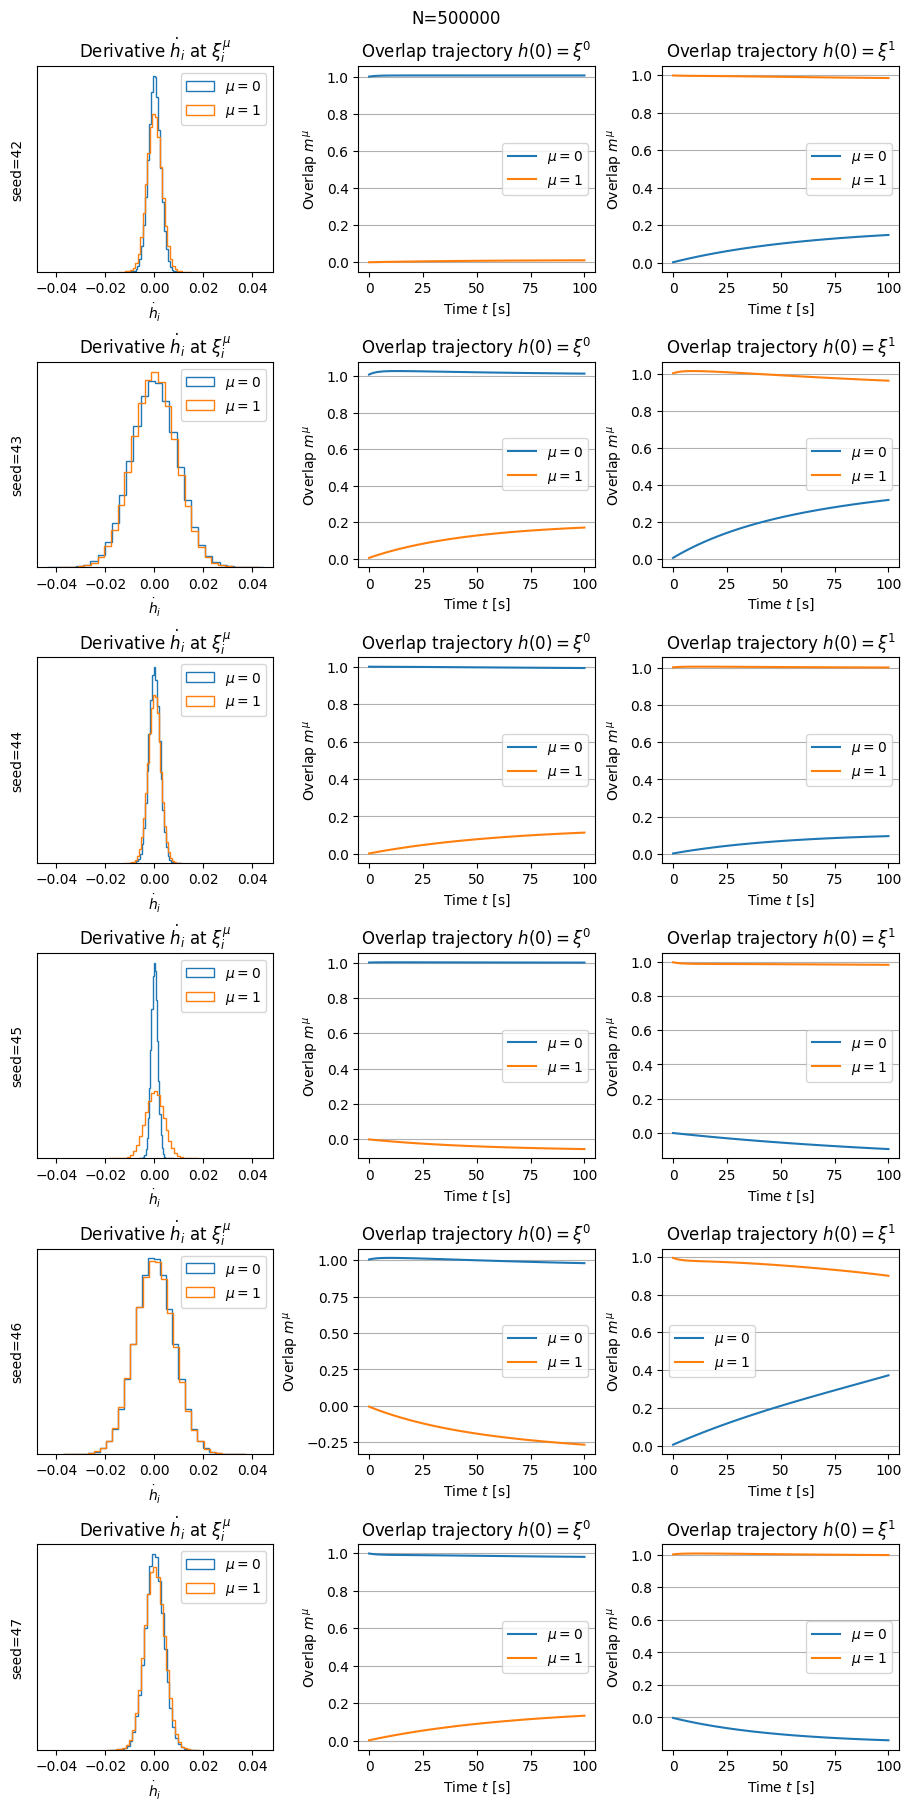

[LowRankRNN{N=1000000, p=2, phi=sigmoid, I_ext=zero}] loading cached simulation eb578f5e51...
[LowRankRNN{N=1000000, p=2, phi=sigmoid, I_ext=zero}] loading cached simulation 0f9f72ada7...
[LowRankRNN{N=1000000, p=2, phi=sigmoid, I_ext=zero}] loading cached simulation 20e346dd73...
[LowRankRNN{N=1000000, p=2, phi=sigmoid, I_ext=zero}] loading cached simulation c9ded812ec...
[LowRankRNN{N=1000000, p=2, phi=sigmoid, I_ext=zero}] loading cached simulation 450c947114...
[LowRankRNN{N=1000000, p=2, phi=sigmoid, I_ext=zero}] loading cached simulation 44501bf59a...
[LowRankRNN{N=1000000, p=2, phi=sigmoid, I_ext=zero}] loading cached simulation 05a680bf7a...
[LowRankRNN{N=1000000, p=2, phi=sigmoid, I_ext=zero}] loading cached simulation 7e8d585316...
[LowRankRNN{N=1000000, p=2, phi=sigmoid, I_ext=zero}] loading cached simulation b6ac7bb1ee...
[LowRankRNN{N=1000000, p=2, phi=sigmoid, I_ext=zero}] loading cached simulation a1a6a37f6f...
[LowRankRNN{N=1000000, p=2, phi=sigmoid, I_ext=zero}] loadin

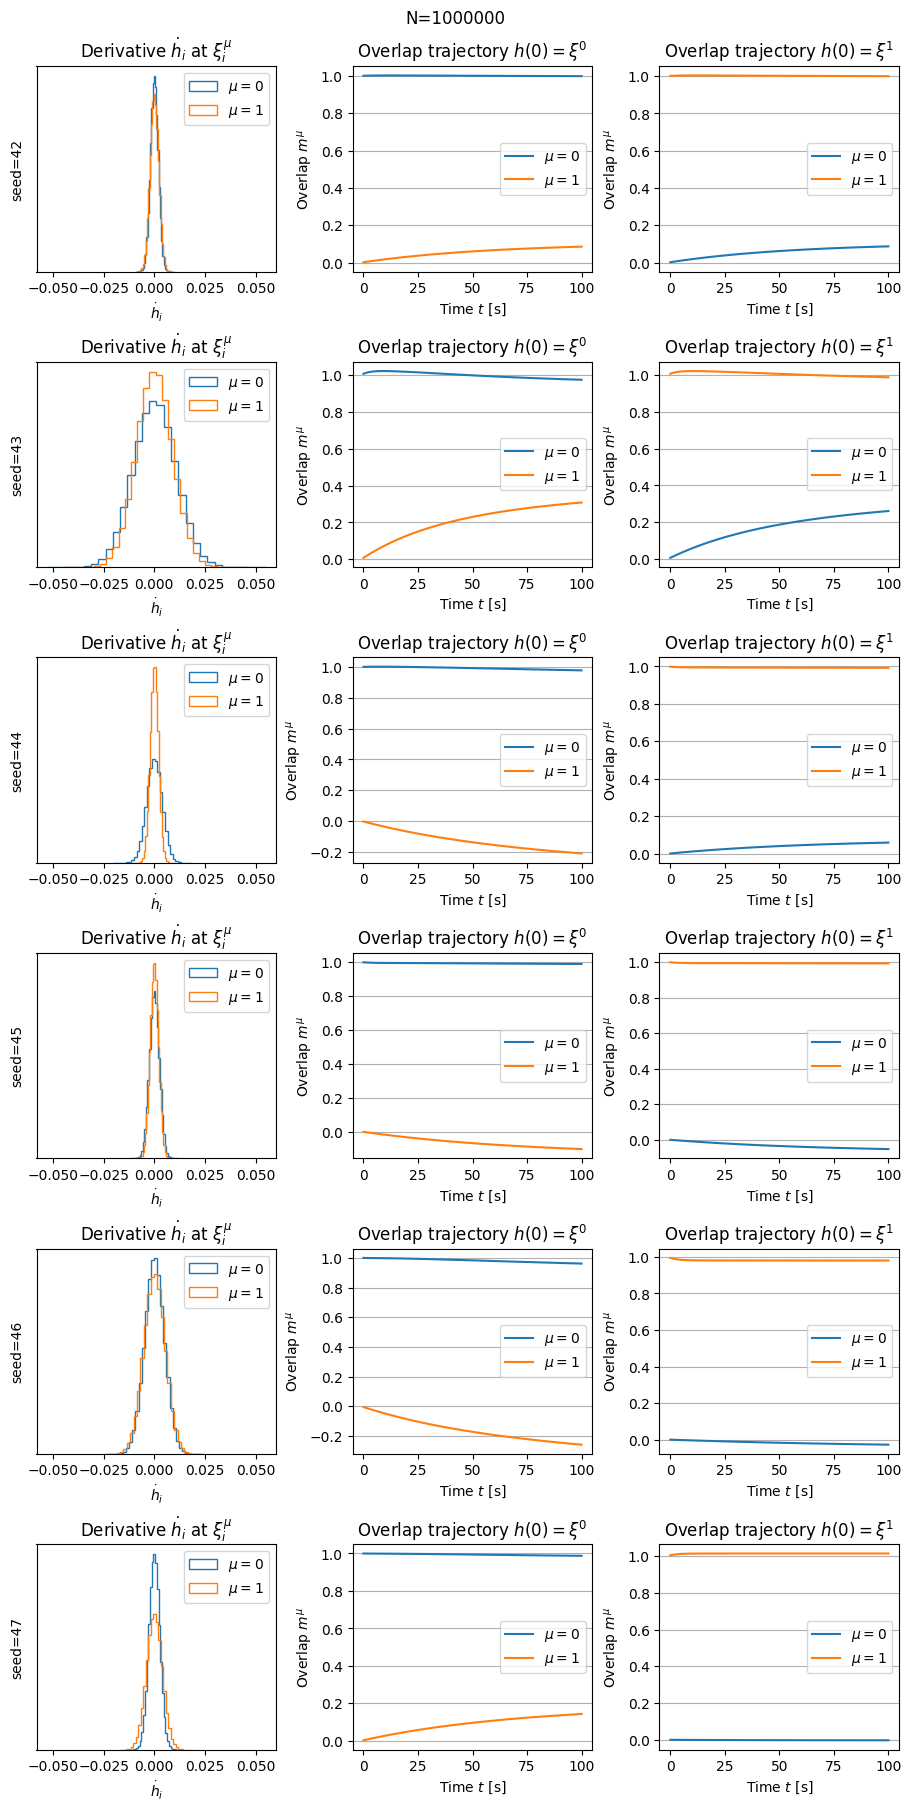

In [8]:
# for N in [1000, 10_000, 50_000, 100_000, 500_000, 1_000_000]:
for N in [1000, 10_000, 50_000, 100_000]:
# for N in [1000]:
	seeds = [ 42, 43, 44, 45, 46, 47 ]
	# flipped = [True, False]  # DEBUG
	# configs = list(itertools.product(seeds, flipped))  # DEBUG
	configs = list(seeds)

	fig, axes = plt.subplots(ncols=3, nrows=len(configs), figsize=(9, 3*len(configs)), constrained_layout=True, sharex='col')
	fig.suptitle(f'N={N}')

	# for row, (seed, flip) in enumerate(configs):  # DEBUG
	for row, seed in enumerate(configs):
		F, G = make_F_G_valentin(p=2, N=N, phi=sigmoid, random_state=seed)
		# if flip:  # DEBUG
		# 	F = np.roll(F, shift=1, axis=1)  # DEBUG
		# 	G = np.roll(G, shift=1, axis=1)  # DEBUG

		rnn = LowRankRNN(F, G, phi=sigmoid, I_ext=zero)
		plot_dh_hist(rnn, figax=(fig, axes[row, 0]))
		res = rnn.simulate_h(rnn.F[:, 0], (0, 100), dt_max=1, progress=True, cache=True)
		plot_overlap_trajectory(rnn, res, figax=(fig, axes[row, 1]))
		axes[row, 1].set_title(axes[row, 1].get_title()+' $h(0)=\\xi^{{0}}$')
		res = rnn.simulate_h(rnn.F[:, 1], (0, 100), dt_max=1, progress=True, cache=True)
		plot_overlap_trajectory(rnn, res, figax=(fig, axes[row, 2]))
		axes[row, 2].set_title(axes[row, 2].get_title()+' $h(0)=\\xi^{{1}}$')

		axes[row, 0].xaxis.set_tick_params(labelbottom=True)  # get ticks back
		axes[row, 1].xaxis.set_tick_params(labelbottom=True)  # get ticks back
		axes[row, 2].xaxis.set_tick_params(labelbottom=True)  # get ticks back

	# add_headers(fig, row_headers=[ f'seed={str(seed)}, {"flip" if flip else "no flip"}' for (seed, flip) in configs ])  # DEBUG
	add_headers(fig, row_headers=[ f'seed={str(seed)}' for seed in configs ])

	plt.show()

### std of $\dot h(\xi^\mu)$ vs deviation of overlap

In [70]:
data = []

for N in np.logspace(3, 7, 13).astype(int):
	if N >= 4641588: break  # i killed the process because it was taking too much time
	seeds = list(range(42, 42+10))
	for seed in seeds:
		rnn = LowRankRNN.new_valentin(p=2, N=N, random_state=seed, phi=sigmoid, I_ext=zero, exclude_self_connections=True)
		res = rnn.simulate(h0=rnn.F[:, 0], t_span=(0, 100), dt_max=5, progress=True, cache=True)
		m = overlap(rnn, res.h[:, -1])
		data.append({
			'N': N, 'seed': seed,
			'std_hdot_mu0': rnn.dh(res.simparams.t_span[0], rnn.F[:, 0]).std(),
			'std_hdot_mu1': rnn.dh(res.simparams.t_span[0], rnn.F[:, 1]).std(),
			'm0': m[0],
			'm1': m[1],
		})

In [71]:
df = pd.DataFrame(data)
df

,N,seed,std_hdot_mu0,std_hdot_mu1,m0,m1
0,1000,42,0.082375,0.078499,0.535957,-0.960394
1,1000,43,0.090798,0.035095,0.733910,0.820437
2,1000,44,0.174243,0.110781,0.098504,-1.390047
3,1000,45,0.011460,0.025238,1.044324,0.054177
4,1000,46,0.049147,0.053505,0.852635,0.706409
...,...,...,...,...,...,...
105,2154434,47,0.003257,0.003599,0.999890,0.117097
106,2154434,48,0.005416,0.002442,1.014620,-0.078762
107,2154434,49,0.005589,0.005501,1.004547,0.146509
108,2154434,50,0.001639,0.001139,1.002010,-0.059839


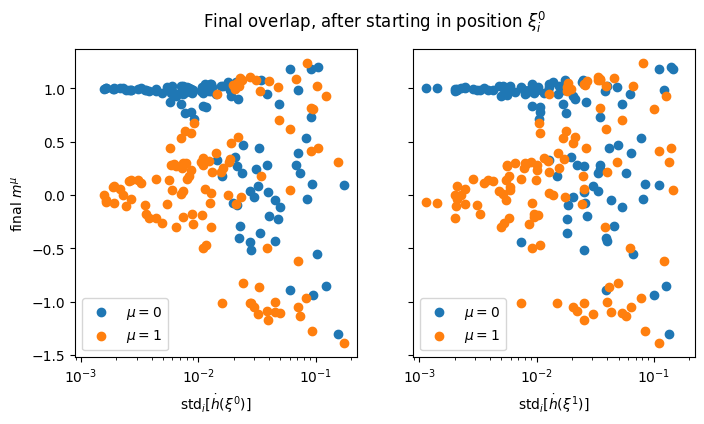

In [73]:
fig, axes = plt.subplots(ncols=2, figsize=(8, 4), sharey=True, sharex=True)

axes[0].scatter(df['std_hdot_mu0'], df['m0'], label='$\\mu=0$')
axes[0].scatter(df['std_hdot_mu0'], df['m1'], label='$\\mu=1$')
axes[0].legend()
axes[0].set_xlabel('$\\mathrm{{std}}_i[\\dot h(\\xi^0)]$')
axes[0].set_ylabel('final $m^\\mu$')
axes[0].set_xscale('log')
axes[1].scatter(df['std_hdot_mu1'], df['m0'], label='$\\mu=0$')
axes[1].scatter(df['std_hdot_mu1'], df['m1'], label='$\\mu=1$')
axes[1].legend()
axes[1].set_xlabel('$\\mathrm{{std}}_i[\\dot h(\\xi^1)]$')
axes[1].set_xscale('log')
fig.suptitle('Final overlap, after starting in position $\\xi^0_i$')

plt.show()

## Correlation between two patterns

In [42]:
def compute_pattern_correlation(N: int, seed: int = 42) -> tuple[float, float]:
	F, G = make_F_G_valentin(p=2, N=N, phi=sigmoid, random_state=seed)
	# np.corrcoef(F.T), np.corrcoef(G.T)
	return np.corrcoef(F[:, 0], F[:, 1])[0, 1], np.corrcoef(G[:, 0], G[:, 1])[0, 1]  # out of diagonal, cross-correlation

Ns = np.logspace(3, 7, 30).astype(int)
seeds = [42, 43, 44, 45]
corrs = [ compute_pattern_correlation(N, seed) for N, seed in itertools.product(Ns, seeds) ]
corrs = np.array(corrs)
corrs = np.abs(corrs)  # we only want the absolute value, which tells the magnitude of the correlation

df = pd.DataFrame(dict(N_seed=list(itertools.product(Ns, seeds)), corr_xi=corrs[:, 0], corr_phi=corrs[:, 1]))
df[['N', 'seed']] = df['N_seed'].tolist()
df.drop(columns=['N_seed'], inplace=True)
df_meancorr = df.groupby('N')[['corr_xi', 'corr_phi']].agg(['mean', 'std']).reset_index()

In [43]:
df_meancorr

N   corr_xi            corr_phi          
                  mean       std      mean       std
0       1000  0.024385  0.022558  0.027083  0.021091
1       1373  0.030593  0.012738  0.028512  0.014275
2       1887  0.015074  0.006900  0.014360  0.003429
3       2592  0.014178  0.006629  0.013120  0.008741
4       3562  0.012541  0.015300  0.010269  0.016340
5       4893  0.012240  0.008715  0.012258  0.008225
6       6723  0.014053  0.012081  0.013477  0.012319
7       9236  0.010082  0.005632  0.009125  0.005744
8      12689  0.004701  0.005399  0.005712  0.005879
9      17433  0.006136  0.004850  0.005824  0.004290
10     23950  0.005040  0.002910  0.005198  0.003228
11     32903  0.003276  0.003951  0.003336  0.004512
12     45203  0.005074  0.002751  0.004949  0.003386
13     62101  0.002988  0.001150  0.002560  0.001658
14     85316  0.004414  0.002686  0.003886  0.002665
15    117210  0.001076  0.000977  0.000834  0.000469
16    161026  0.002690  0.001636  0.002456  0.001793
17    221221  0.002038  0.000606  0.001966  0.000862
18    303919  0.001844  0.001089  0.001780  0.001033
19    417531  0.001392  0.000678  0.001246  0.000637
20    573615  0.000966  0.000801  0.000712  0.000573
21    788046  0.001107  0.000842  0.001226  0.000787
22   1082636  0.001335  0.001006  0.001320  0.001123
23   1487352  0.000674  0.000768  0.000590  0.000745
24   2043359  0.000596  0.000293  0.000606  0.000384
25   2807216  0.000453  0.000372  0.000449  0.000336
26   3856620  0.000188  0.000351  0.000247  0.000350
27   5298316  0.000486  0.000269  0.000419  0.000350
28   7278953  0.000184  0.000158  0.000178  0.000163
29  10000000  0.000247  0.000166  0.000286  0.000164

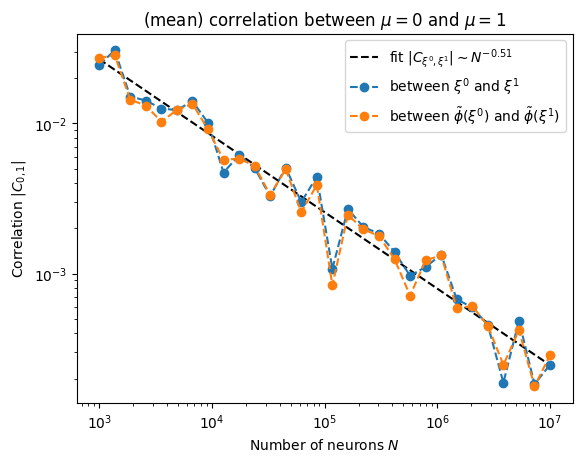

In [45]:
fit = np.poly1d(np.polyfit(np.log10(df_meancorr['N']), np.log10(df_meancorr[('corr_xi', 'mean')]), deg=1))

fig, ax = plt.subplots()
ax.plot(df_meancorr['N'], 10**fit(np.log10(df_meancorr['N'])), 'k--', label=f'fit $|C_{{\\xi^0,\\xi^1}}| \\sim N^{{{fit.coefficients[0]:.2f}}}$')
ax.plot(df_meancorr['N'], df_meancorr[('corr_xi', 'mean')], 'o--', label='between $\\xi^{{0}}$ and $\\xi^{{1}}$')
ax.plot(df_meancorr['N'], df_meancorr[('corr_phi', 'mean')], 'o--', label='between $\\tilde\\phi(\\xi^{{0}})$ and $\\tilde\\phi(\\xi^{{1}})$')
ax.legend()
ax.set_xlabel('Number of neurons $N$')
ax.set_ylabel('Correlation $|C_{{0,1}}|$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title('(mean) correlation between $\\mu=0$ and $\\mu=1$')
plt.show()

## Study of eigenvalues

In [3]:
dsigmoid = lambda x: sigmoid(x) * (1 - sigmoid(x))

In [4]:
# estimate of <xi phi(xi) dphi(hstar)>
params = LowRankRNNParams.new_valentin(p=1, N=100_000_000, phi=sigmoid, I_ext=zero, exclude_self_connections=False)
for hstar in np.zeros_like(params.F), params.F:
	l = params.F * params.G * dsigmoid(hstar) - 1
	print('{:.5f} ± {:.5f}'.format(l.mean(axis=0)[0], l.std(axis=0, ddof=1)[0] / np.sqrt(len(l))))

0.19061 ± 0.00014
-0.28090 ± 0.00006


In [5]:
# estimate of <xi phi(xi) dphi(hstar)>
params = LowRankRNNParams.new_valentin(p=1, N=100_000_000, phi=linear, I_ext=zero, exclude_self_connections=False)
for hstar in np.zeros_like(params.F), params.F:
	l = params.F * params.G - 1
	print('{:.5f} ± {:.5f}'.format(l.mean(axis=0)[0], l.std(axis=0, ddof=1)[0] / np.sqrt(len(l))))

-0.00099 ± 0.00014
-0.00099 ± 0.00014


In [34]:
params = LowRankRNNParams.new_valentin(p=2, N=64, phi=sigmoid, I_ext=zero, exclude_self_connections=False)

In [35]:
hstar = params.F[:, 0]
# hstar = np.zeros(params.N)
dphi = dsigmoid(hstar)

In [36]:
l = 1/params.N * np.einsum('im,im->m', params.F, params.G * dphi[:, None]) - 1
l.sort()
l

array([-0.22617403, -0.13334952])

In [37]:
J = np.einsum('im,jm->ij', params.F, params.G * dphi[:, None]) / params.N - np.eye(params.N)
np.sort(np.linalg.eigvals(J).real)[::-1]

array([-0.12715785, -0.2323657 , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        ])

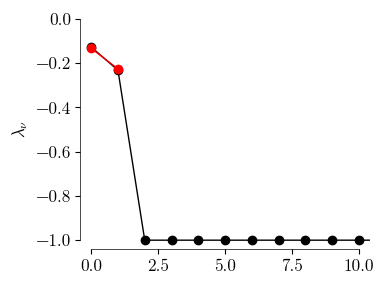

In [38]:
plt.plot(np.sort(np.linalg.eigvals(J).real)[::-1], marker='o')
plt.plot(l[::-1], color='r', marker='o')
plt.ylim((-1, 0))
plt.xlim((0, 10))
plt.ylabel('$\\lambda_\\nu$')
breathe()

**derivation of eigenvalues when phi is a taylor expansion**

In [6]:
import sympy as sp

In [102]:
z, c0, c1, c2, c3 = sp.symbols('z c_0 c_1 c_2 c_3', real=True)
phi = c0 + c1*z + c2*z**2 + c3*z**3
phi

c_0 + c_1*z + c_2*z**2 + c_3*z**3

In [103]:
dphi = phi.diff(z)
dphi

c_1 + 2*c_2*z + 3*c_3*z**2

In [104]:
def expect(f, z):
	return f.coeff(z, 0) + f.coeff(z, 2) + 3*f.coeff(z, 4) + 15*f.coeff(z, 6) + 105*f.coeff(z, 8)

In [105]:
exp_phi = expect(phi, z)
exp_phi

c_0 + c_2

In [106]:
phi2 = ((phi)**2).expand().collect(z)
phi2

c_0**2 + 2*c_0*c_1*z + 2*c_2*c_3*z**5 + c_3**2*z**6 + z**4*(2*c_1*c_3 + c_2**2) + z**3*(2*c_0*c_3 + 2*c_1*c_2) + z**2*(2*c_0*c_2 + c_1**2)

In [107]:
exp_phi2 = expect(phi2, z)
exp_phi2

c_0**2 + 2*c_0*c_2 + c_1**2 + 6*c_1*c_3 + 3*c_2**2 + 15*c_3**2

In [108]:
var_phi = exp_phi2 - exp_phi**2
var_phi

c_0**2 + 2*c_0*c_2 + c_1**2 + 6*c_1*c_3 + 3*c_2**2 + 15*c_3**2 - (c_0 + c_2)**2

In [109]:
tildephi = ((phi - exp_phi) / var_phi).simplify()
print('tilde phi')
display(tildephi)
print(sp.latex(tildephi))

tilde phi


(c_1*z + c_2*z**2 - c_2 + c_3*z**3)/(c_1**2 + 6*c_1*c_3 + 2*c_2**2 + 15*c_3**2)

\frac{c_{1} z + c_{2} z^{2} - c_{2} + c_{3} z^{3}}{c_{1}^{2} + 6 c_{1} c_{3} + 2 c_{2}^{2} + 15 c_{3}^{2}}


In [110]:
print('zero')
acab = (tildephi * dphi.subs({z: 0}) * z).simplify().expand().collect(z)
l = (expect(acab.expand().collect(z), z) - 1).simplify()
print('eigenvalue(zero)=')
display(l)
print(sp.latex(l))
print('dphi(zero)=')
print(sp.latex(dphi.subs({z: 0}).simplify()))

print()
print()
print()

print('pattern')
acab = (tildephi * dphi * z).simplify().expand().collect(z)
l = (expect(acab.expand().collect(z), z) - 1).simplify()
print('eigenvalue(pattern)=')
display(l)
print(sp.latex(l))
print('dphi(pattern)=')
print(sp.latex(dphi.subs({z: z}).simplify()))


zero
eigenvalue(zero)=


(-3*c_1*c_3 - 2*c_2**2 - 15*c_3**2)/(c_1**2 + 6*c_1*c_3 + 2*c_2**2 + 15*c_3**2)

\frac{- 3 c_{1} c_{3} - 2 c_{2}^{2} - 15 c_{3}^{2}}{c_{1}^{2} + 6 c_{1} c_{3} + 2 c_{2}^{2} + 15 c_{3}^{2}}
dphi(zero)=
c_{1}



pattern
eigenvalue(pattern)=


2*(3*c_1*c_3 + c_2**2 + 15*c_3**2)/(c_1**2 + 6*c_1*c_3 + 2*c_2**2 + 15*c_3**2)

\frac{2 \cdot \left(3 c_{1} c_{3} + c_{2}^{2} + 15 c_{3}^{2}\right)}{c_{1}^{2} + 6 c_{1} c_{3} + 2 c_{2}^{2} + 15 c_{3}^{2}}
dphi(pattern)=
c_{1} + 2 c_{2} z + 3 c_{3} z^{2}
